In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [24]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3287 non-null   object 
 1   avg     3287 non-null   float64
 2   min     3287 non-null   float64
 3   max     3287 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.8+ KB


In [4]:
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


In [5]:
temp.head(-5)

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8
...,...,...,...,...
3277,2019-12-22,4.1,0.3,8.4
3278,2019-12-23,3.4,0.3,5.2
3279,2019-12-24,0.8,-2.9,6.5
3280,2019-12-25,2.0,-2.7,6.6


# EDA

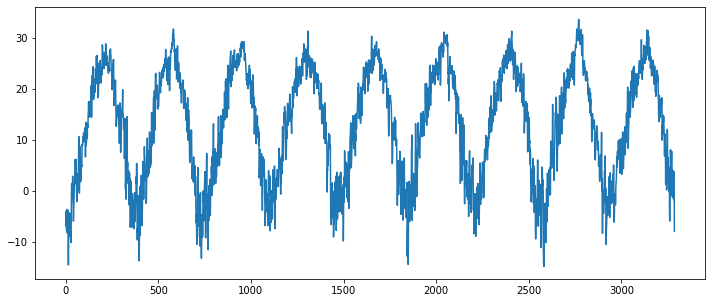

<class 'pandas.core.frame.DataFrame'>


In [25]:
temp_data = temp[['avg']]

plt.figure(figsize=(12,5))
plt.plot(temp_data)
plt.show()
print(type(temp_data))

# scaling

In [26]:
scaler = MinMaxScaler(feature_range=(-1,1))
temp_data = scaler.fit_transform(temp_data)

In [13]:
temp_data.head()

,avg
0,-6.8
1,-5.4
2,-4.5
3,-3.9
4,-4.0


# data split (train:test)

In [27]:
train = temp_data[0:2557]
test = temp_data[2557:]

In [28]:
def create_dataset(time_data, look_back = 1):
  data_X, data_y = [], []

  for i in range(len(time_data) - look_back):
    data_X.append(time_data[i:(i + look_back), 0])
    data_y.append(time_data[i + look_back, 0])
    
  return np.array(data_X), np.array(data_y)

In [29]:
look_back =180

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180), (2377,), (550, 180), (550,))

In [33]:
train[0:180,0]

array([-0.67010309, -0.61237113, -0.57525773, -0.55051546, -0.55463918,
       -0.70309278, -0.67835052, -0.53814433, -0.67835052, -0.72783505,
       -0.61237113, -0.72783505, -0.63298969, -0.54639175, -0.89278351,
       -0.98762887, -0.78969072, -0.66597938, -0.66185567, -0.72783505,
       -0.67010309, -0.56701031, -0.57525773, -0.75257732, -0.73608247,
       -0.74020619, -0.75670103, -0.71546392, -0.76494845, -0.80618557,
       -0.64536082, -0.39793814, -0.33608247, -0.32783505, -0.34020619,
       -0.3443299 , -0.37731959, -0.37731959, -0.27010309, -0.43917526,
       -0.47628866, -0.50927835, -0.63298969, -0.58762887, -0.52989691,
       -0.46391753, -0.41443299, -0.35257732, -0.32371134, -0.33195876,
       -0.17113402, -0.13402062, -0.13402062, -0.15876289, -0.13814433,
       -0.30721649, -0.13402062, -0.21649485, -0.2742268 , -0.36907216,
       -0.47628866, -0.47628866, -0.38556701, -0.30309278, -0.24948454,
       -0.32371134, -0.32371134, -0.3814433 , -0.33195876, -0.2 

In [34]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1],1))

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180, 1), (2377,), (550, 180, 1), (550,))

In [37]:
model = Sequential()
model.add(LSTM(64, input_shape = (None, 1)))
model.add(Dense(1, activation = 'tanh'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [39]:
%%time
model.compile(loss='mean_squared_error', optimizer='adam') # metrics가 없네.. 예측모델이기 때문


hist = model.fit(train_X, train_y, epochs=200, batch_size=16, validation_data=(test_X, test_y))

Epoch 1/200
149/149 [==============================] - 34s 11ms/step - loss: 0.0417 - val_loss: 0.0158
Epoch 2/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0159 - val_loss: 0.0128
Epoch 3/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0138 - val_loss: 0.0122
Epoch 4/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0123 - val_loss: 0.0100
Epoch 5/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 6/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 7/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 8/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 9/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 10/200
149/149 [==============================] - 1s 8ms/step - loss: 0.0079 - val_

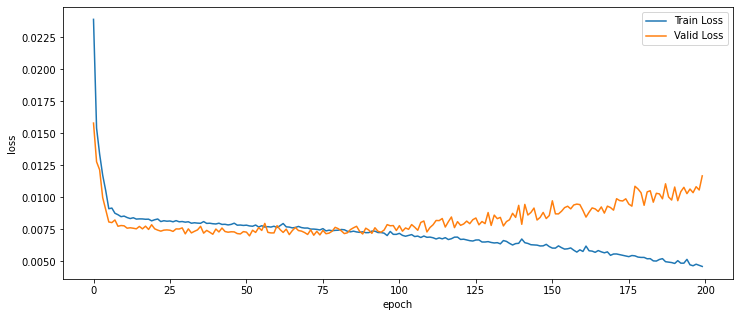

In [40]:
plt.figure(figsize=(12,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Valid Loss'], loc='upper right')
plt.show()

In [41]:
trainScore = model.evaluate(train_X, train_y, verbose=0)
print('Train Score:', trainScore)

testScore = model.evaluate(test_X, test_y, verbose=0)
print('Test Score:', testScore)

Train Score: 0.0044364118948578835
Test Score: 0.011684225872159004


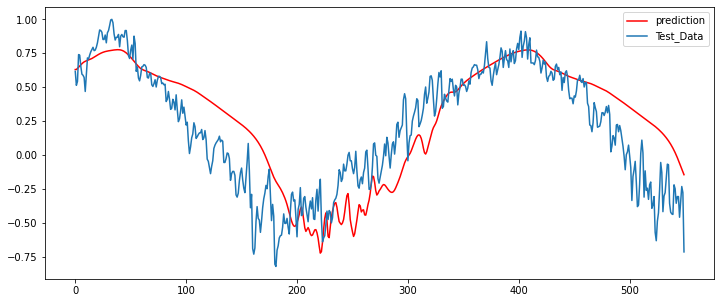

In [43]:
look_ahead = 550

xhat = test_X[0]

predictions = np.zeros((look_ahead, 1))

for i in range(look_ahead):
  prediction = model.predict(np.array([xhat]), batch_size=1)
  predictions[i] = prediction
  xhat = np.vstack([xhat[1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label='prediction')
plt.plot(np.arange(look_ahead), test_y[:look_ahead], label='Test_Data')
plt.legend()
plt.show()